# Cozy Gaming Behavior Analysis

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fast')

%matplotlib inline


In [2]:
# Read 
df = pd.read_csv('synthdata2.csv')
df.head()


,Marca temporal,Gender,Age,Which of the following types of cozy games have you played in the past month? (choose all that apply),How often do you play cozy games?,How do you typically discover new cozy games to play?,How much time do you spend playing cozy games in a typical week?,How much money have you spent on in-game purchases in the past month?,Which of the following in-game purchases have you made in the past month? (choose all that apply),How important are the following features when deciding whether to play a cozy game? [Engaging storyline],How important are the following features when deciding whether to play a cozy game? [Attractive graphics],How important are the following features when deciding whether to play a cozy game? [Relaxing atmosphere],How important are the following features when deciding whether to play a cozy game? [Social interactions with other players],How important are the following features when deciding whether to play a cozy game? [Challenging gameplay],Have you ever recommended a cozy game to a friend or family member?,How likely are you to continue playing a cozy game after completing all available levels or content?,What role does music play in cozy games for you?,Which of the following devices do you use to play cozy games? (Select all that apply),"What are some of your favorite cozy games, and why do you enjoy playing them? (Please describe briefly)"
0,2023/05/03 3:01:47 a. m. GMT-4,Male,26-30,Simulation games,Weekly,Online reviews and ratings,2-5 hours,$10-$25,NaN,Important,Somewhat Important,Important,Important,Regular,Yes,Somewhat Likely,It helps me relax and focus,Mobile Phone,NaN
1,2023/04/06 12:48:52 a. m. GMT-4,Male,41-45,Casual games,Occasionally,Word of mouth,2-5 hours,$0,Other,Regular,Important,Very Important,Important,Not Important,No,Neutral,"I appreciate the music, but it is not essentia...",Other,Endless Ocean (love the feel of water/swimming...
2,2023/04/07 12:17:24 a. m. GMT-4,Female,26-30,Casual games;Simulation games,Weekly,Social media recommendations;Word of mouth;Onl...,1-2 hours,$0,Cosmetics or skins,Regular,Very Important,Important,Not Important,Very Important,Yes,Somewhat Likely,It is essential to my gaming experience,PC/Laptop,"Animal crossing, is relaxing and addictive. Al..."
3,2023/04/06 2:04:56 p. m. GMT-4,Female,21-25,Simulation games,Weekly,Word of mouth,2-5 hours,$0,NaN,Important,Very Important,Very Important,Important,Regular,No,Very Likely,"I appreciate the music, but it is not essentia...",PC/Laptop;Gaming Console,"I think I was emailed the wrong survey, I excl..."
4,2023/04/09 12:17:00 a. m. GMT-4,Female,26-30,Other,Weekly,Online reviews and ratings,2-5 hours,Less than $10,Virtual currency,Not Important,Very Important,Important,Important,Important,Yes,Neutral,It helps me relax and focus,PC/Laptop;Gaming Console,NaN


In [3]:
#Renaming columns for better data management

df.rename(columns ={df.columns[0] : 'Date_stamp', df.columns[3] :'Game_Category', 
                     df.columns[4] :'Gaming_Frequency', df.columns[5] :'Game_Discovery',
                    df.columns[6] : 'Weekly_Gaming_Time', df.columns[7] : 'Game_Purchase',
                    df.columns[8] : 'Game_Purchase_Category', df.columns[9] : 'Storyline_Rating', 
                    df.columns[10] :'Graphics_Rating', df.columns[11] : 'Atmosphere_Rating',
                    df.columns[12] : 'Coplay_Rating', df.columns[13] : 'Gameplay_Rating', 
                    df.columns[14] : 'Recommendation', df.columns[15] : 'Game_Likelihood',
                    df.columns[16] : 'Music_Role', df.columns[17] : 'Device',
                    df.columns[18] :'Game_Names'}, inplace = True)



df.head()

,Date_stamp,Gender,Age,Game_Category,Gaming_Frequency,Game_Discovery,Weekly_Gaming_Time,Game_Purchase,Game_Purchase_Category,Storyline_Rating,Graphics_Rating,Atmosphere_Rating,Coplay_Rating,Gameplay_Rating,Recommendation,Game_Likelihood,Music_Role,Device,Game_Names
0,2023/05/03 3:01:47 a. m. GMT-4,Male,26-30,Simulation games,Weekly,Online reviews and ratings,2-5 hours,$10-$25,NaN,Important,Somewhat Important,Important,Important,Regular,Yes,Somewhat Likely,It helps me relax and focus,Mobile Phone,NaN
1,2023/04/06 12:48:52 a. m. GMT-4,Male,41-45,Casual games,Occasionally,Word of mouth,2-5 hours,$0,Other,Regular,Important,Very Important,Important,Not Important,No,Neutral,"I appreciate the music, but it is not essentia...",Other,Endless Ocean (love the feel of water/swimming...
2,2023/04/07 12:17:24 a. m. GMT-4,Female,26-30,Casual games;Simulation games,Weekly,Social media recommendations;Word of mouth;Onl...,1-2 hours,$0,Cosmetics or skins,Regular,Very Important,Important,Not Important,Very Important,Yes,Somewhat Likely,It is essential to my gaming experience,PC/Laptop,"Animal crossing, is relaxing and addictive. Al..."
3,2023/04/06 2:04:56 p. m. GMT-4,Female,21-25,Simulation games,Weekly,Word of mouth,2-5 hours,$0,NaN,Important,Very Important,Very Important,Important,Regular,No,Very Likely,"I appreciate the music, but it is not essentia...",PC/Laptop;Gaming Console,"I think I was emailed the wrong survey, I excl..."
4,2023/04/09 12:17:00 a. m. GMT-4,Female,26-30,Other,Weekly,Online reviews and ratings,2-5 hours,Less than $10,Virtual currency,Not Important,Very Important,Important,Important,Important,Yes,Neutral,It helps me relax and focus,PC/Laptop;Gaming Console,NaN


In [4]:
#Column Data Types
df.dtypes

Date_stamp                object
Gender                    object
Age                       object
Game_Category             object
Gaming_Frequency          object
Game_Discovery            object
Weekly_Gaming_Time        object
Game_Purchase             object
Game_Purchase_Category    object
Storyline_Rating          object
Graphics_Rating           object
Atmosphere_Rating         object
Coplay_Rating             object
Gameplay_Rating           object
Recommendation            object
Game_Likelihood           object
Music_Role                object
Device                    object
Game_Names                object
dtype: object

In [5]:
#Missing Data in %
df.isnull().mean()*100

Date_stamp                 0.000000
Gender                     0.000000
Age                        0.000000
Game_Category              0.000000
Gaming_Frequency           0.000000
Game_Discovery             0.000000
Weekly_Gaming_Time         0.000000
Game_Purchase              0.000000
Game_Purchase_Category    21.433333
Storyline_Rating           0.000000
Graphics_Rating            0.000000
Atmosphere_Rating          0.000000
Coplay_Rating              0.000000
Gameplay_Rating            0.000000
Recommendation             0.000000
Game_Likelihood            0.000000
Music_Role                 0.000000
Device                     0.000000
Game_Names                24.400000
dtype: float64

In [6]:
#Read Gender unique values
df['Gender'].unique()

array(['Male', 'Female', 'Male;Non-Binary'], dtype=object)

In [7]:
#Read Gameplay Rating unique values
df['Gameplay_Rating'].unique()

array(['Regular', 'Not Important', 'Very Important', 'Important',
       'Somewhat Important', 'Very Importante'], dtype=object)

In [8]:
print(np.unique(df[['Age', 'Weekly_Gaming_Time']].values))

['1-2 hours' '16-20' '2-5 hours' '21-25' '26-30' '31-35' '36-40' '41-45'
 'Less than 1 hour' 'More than 10 hours']


In [9]:
#Read Game purchase unique values
df['Game_Purchase'].unique()

array(['$10-$25', '$0 ', 'Less than $10', 'More than $50', 'Menos de $10'],
      dtype=object)

In [10]:
#Data cleaning 

#Defining Data discrepancies, data found in spanish, for example
rating_values = {'Very Importante': 'Very Important'}
purchase_values = {'Menos de $10':'Less than $10'}

#Mapping current rating values to numeric values
map_rating_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values
#Graphics
df['Graphics_Rating'] = df['Graphics_Rating'].replace(map_rating_val)

#Storyline

df['Storyline_Rating'] = df['Storyline_Rating'].replace(map_rating_val)

#Atmosphere
df['Atmosphere_Rating'] = df['Atmosphere_Rating'].replace(rating_values)
df['Atmosphere_Rating'] = df['Atmosphere_Rating'].replace(map_rating_val)

#Coplay
df['Coplay_Rating'] = df['Coplay_Rating'].replace(map_rating_val)


#Gameplay
df['Gameplay_Rating'] = df['Gameplay_Rating'].replace(rating_values)
df['Gameplay_Rating'] = df['Gameplay_Rating'].replace(map_rating_val)

#Grouping Gender Values
map_gen_val = {'Male;Non-Binary': 'Other'}
df['Gender'] = df['Gender'].replace(map_gen_val)

df['Game_Purchase'] = df['Game_Purchase'].replace(purchase_values)

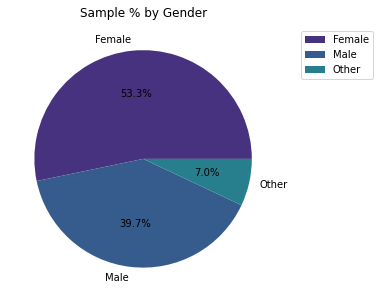

In [30]:
#% of sample by Gender

gender_counts = df.groupby('Gender').count()
palette = sns.color_palette('viridis')

gender_counts.plot.pie(y='Age',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Sample % by Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

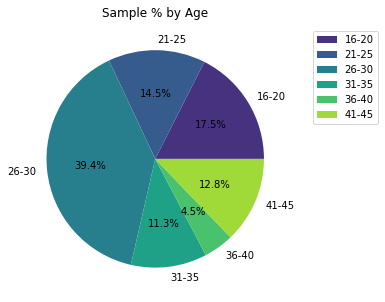

In [11]:
#% of sample by age

age_counts = df.groupby('Age').count()
palette = sns.color_palette('viridis')

age_counts.plot.pie(y='Gender',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Sample % by Age')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

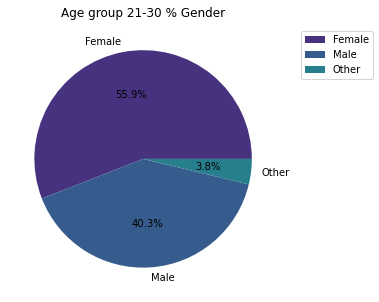

In [37]:
newagedf = df[(df['Age']=='26-30') | (df['Age']=='21-25')]
newgen_counts = newagedf.groupby('Gender').count()
palette = sns.color_palette('viridis')

newgen_counts.plot.pie(y='Age',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Age group 21-30 % Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

Almost 50% of our sample is people from 21-30 Years old where almost 56% is female and 40% is Male leaving the Other % with almost 4%

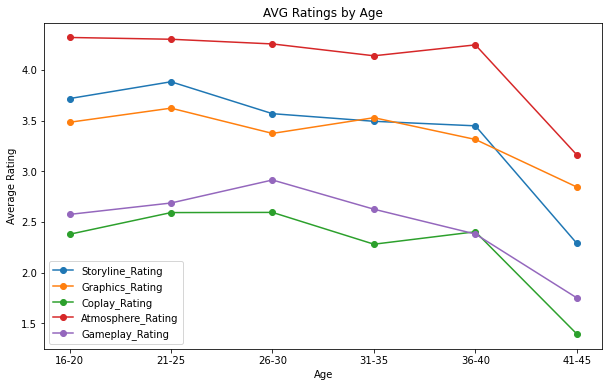

In [12]:
#Rating Categories Compared by Age
# List of columns you want to compare
columns_to_compare = ['Storyline_Rating', 'Graphics_Rating', 'Coplay_Rating','Atmosphere_Rating','Gameplay_Rating']

# Group the DataFrame by 'Age' and calculate the mean ratings for each age group
age_mean_ratings = df.groupby('Age')[columns_to_compare].mean().reset_index()

# Converting columns to NumPy arrays
age = age_mean_ratings['Age'].to_numpy()
ratings = age_mean_ratings[columns_to_compare].to_numpy()

# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through the columns and plot them
for i, column in enumerate(columns_to_compare):
    plt.plot(age, ratings[:, i], label=column, marker='o')

plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('AVG Ratings by Age')
plt.legend()


plt.show()



**DEFINITIONS**

1. _Atmosphere:._  Relaxing Atmosphere
2. _Graphics:._ Attractive Graphics
3. _Storyline:._ Engaging Storyline

On the graph above we can see that the <font color="red">Atmosphere Rating</font> and the <font color="orange">Graphics Rating</font> are the options that have the **highest** ratings by age. 

On all Ratings we can see a decrease by age. Atmosphere rating being the highest on the 36-40 group age and Storyline Rating being the highest on the 21-25 age group. 

**Last age group gave very low ratings meaning they don´t care that much about the ratings mentioned to play a cozy videogame, since they are 12% of our sample, we can neglect this group to continue with the analysis**

Now let´s create graphs more detailed towards the top 3 Ratings: Atmosphere, Storyline and Graphics. 



In [13]:
#Create new data frame neglecting last age group 41-45
newdf = df[df['Age'] != '41-45']


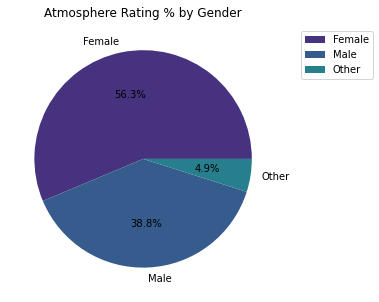

In [14]:
#Top Rated Feature % by age

gen_counts = newdf.groupby('Gender').count()
palette = sns.color_palette('viridis')

gen_counts.plot.pie(y='Atmosphere_Rating',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('Atmosphere Rating % by Gender')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

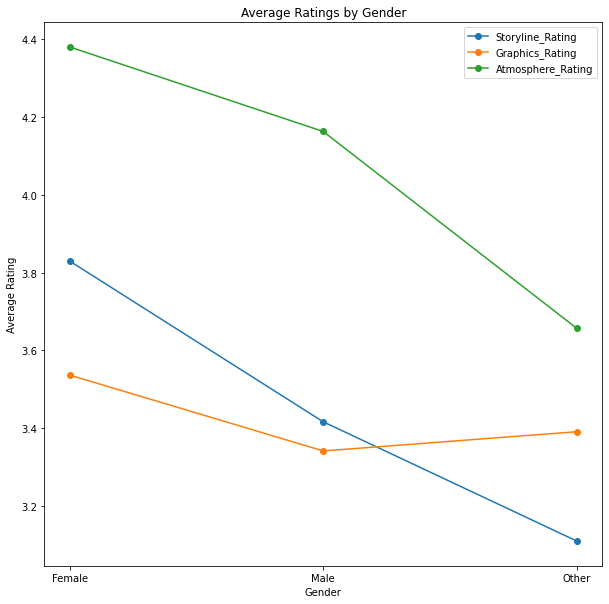

In [15]:
# Top Rated Features by Gender
# List of columns you want to compare
columns_to_compare_g = ['Storyline_Rating', 'Graphics_Rating', 'Atmosphere_Rating']

# Group the DataFrame by 'Gender' and calculate the mean ratings for each age group
gender_mean_ratings = newdf.groupby('Gender')[columns_to_compare_g].mean().reset_index()

# Convert columns to NumPy arrays
gen = gender_mean_ratings['Gender'].to_numpy()
ratings_g = gender_mean_ratings[columns_to_compare_g].to_numpy()

# Set the figure size
plt.figure(figsize=(10, 10))

# Loop through the columns and plot them
for i, column in enumerate(columns_to_compare_g):
    plt.plot(gen, ratings_g[:, i], label=column, marker='o')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Gender')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In the visualizations above,a clear trend emerges, is evident that **female users** consistently assign **higher ratings** compared to other users. This suggests that our female users assign more importance to the above features compared to other player. Notably, the relaxing atmosphere stands out as the most highly-rated feature when it comes to selecting the ideal game for a cozy gaming experience, regardles of gender.

Additionally, it's worth highlighting that the distribution of ratings between female and male users is almost evenly split, with each gender contributing approximately half of the total ratings. This balanced distribution prompts the need for further in-depth analysis to uncover more insights.

In [ ]:
#DO a % pie chart on spent categories to illustrate the ammount and then neglect from below chart

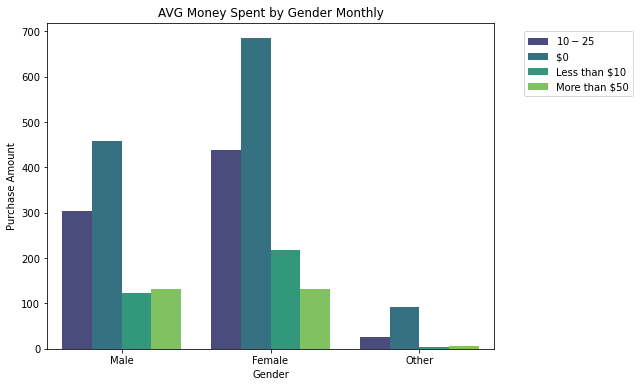

In [45]:
# Who is spending the most on in-game purchases and what are they spending on?
#Game purchases ($ Range)

plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=newdf,hue='Game_Purchase', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Purchase Amount')
plt.title('AVG Money Spent by Gender Monthly')
plt.show()

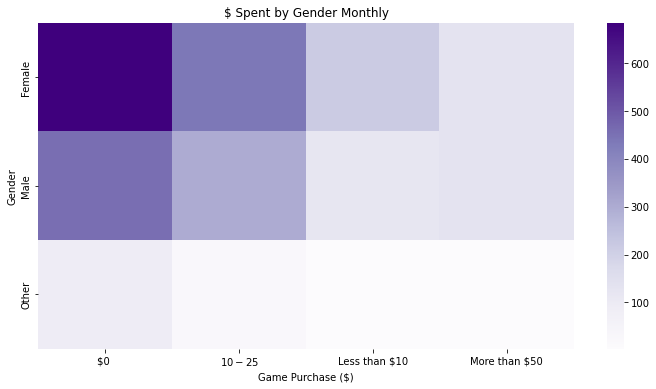

In [24]:
#Purchases by gender
h_map_purchase = newdf.groupby(by=['Gender','Game_Purchase']).count()['Age'].unstack().sort_index(axis=0, level='Game_Purchase',ascending=True)

#Heat map how much $ was spent by gender

plt.figure(figsize=(12,6))
sns.heatmap(h_map_purchase,cmap='Purples')
plt.xlabel('Game Purchase ($)')
plt.ylabel('Gender')
plt.title('$ Spent by Gender Monthly')
plt.show()


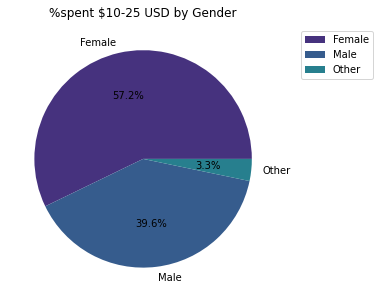

In [18]:
# Create a df only using the highest purchase value range 10-25
purchase_newdf = newdf[newdf['Game_Purchase'] == '$10-$25']

# Count the number of rows in the filtered DataFrame by gender
purchase_bygen_counts = purchase_newdf.groupby('Gender').size()

# Set color palette
palette = sns.color_palette('viridis')

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(purchase_bygen_counts, labels=purchase_bygen_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('%spent $10-25 USD by Gender')
plt.gca().set_ylabel('')  # Remove the default ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

An interesting observation from the above visualizations makes it clear that most of our users prefer not to spend money on cozy games. However, it´s particularly intriguing that the largest spending group, accounting for 53% of the sample, happens to be our female users, with an average monthly expenditure falling in the range of 10-25 USD

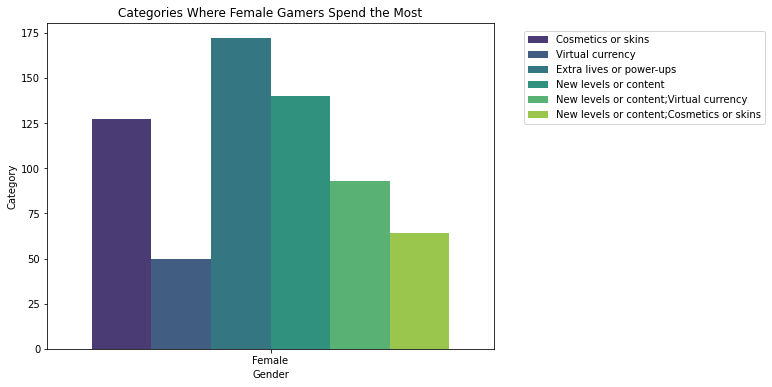

In [27]:
#Now let´s see what are users spending the most money on
#NOTE: EXCLUDE OTHER VALUES DUE TO MISSING INFORMATION

#New filtered df = Purchases by 'Gender' == Female and excluding 'Other' Value from the Game_Purchase_Category column
#Excluding the 'Other' value due to it being the highest category in purchases which unfortunately lacks specific data

femother_df = newdf[(newdf['Gender']== 'Female')&(newdf['Game_Purchase_Category']!='Other')]

plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=femother_df,hue='Game_Purchase_Category', palette='viridis')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Female Gamers Spend the Most')
plt.show()

In the graph above, we intentionally excluded the 'Other' value from the Game_Purchase_Category. This decision was made because 'Other' was the dominant category in purchases, yet it lacks specific data for a more in-depth analysis. Instead, our focus shifted to the second and third-highest categories: 'Extra Lives/Power Ups' and 'New Levels or Content,' where we can potentially gain more valuable insights into user spending behavior.

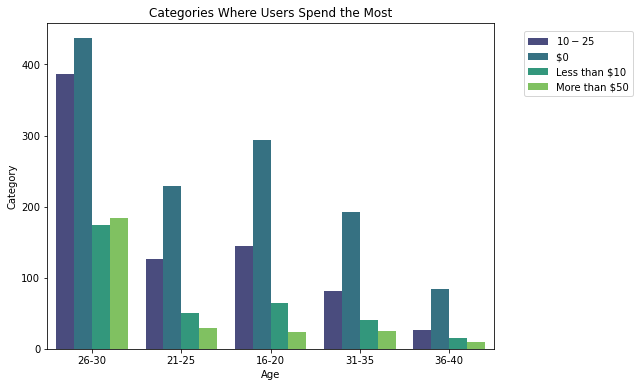

In [46]:

plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=newdf,hue='Game_Purchase', palette='viridis')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Users Spend the Most')
plt.show()

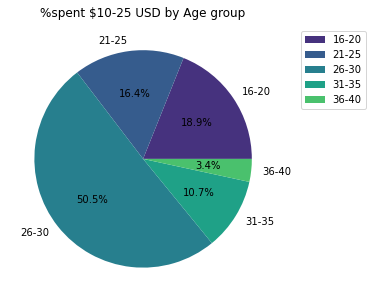

In [39]:
#Now let´s see which age groups spent the most and in what

# Count the number of rows in the filtered DataFrame by gender
purchase_byfilteredage_counts = purchase_newdf.groupby('Age').size()

# Set color palette
palette = sns.color_palette('viridis')

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(purchase_byfilteredage_counts, labels=purchase_byfilteredage_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('%spent $10-25 USD by Age group')
plt.gca().set_ylabel('')  # Remove the default ylabel
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()


We can see that the age group that spent the most was the 26-30 having 50% of the sample group with an average of 10-25USD Monthly, followed by the 16-20 age group and in third place 21-25.

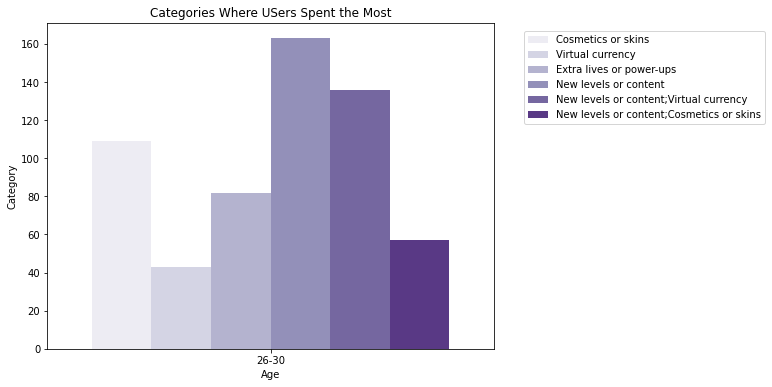

In [47]:
#Now let´s see the 21-25 group where are they spending the most
#NOTE: EXCLUDE OTHER VALUES DUE TO MISSING INFORMATION

#New filtered df = Purchases by 'Agr' == 26-30 and excluding 'Other' Value from the Game_Purchase_Category column
#Excluding the 'Other' value due to it being the highest category in purchases which unfortunately lacks specific data

topage_group_df = newdf[(newdf['Age']== '26-30')&(newdf['Game_Purchase_Category']!='Other')]

plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=topage_group_df,hue='Game_Purchase_Category', palette='Purples')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Category')
plt.title('Categories Where Users Spent the Most')
plt.show()

We can see that our 50% of the sample users from 26-30, prefer to spend their money on Virtual Currency and New levels

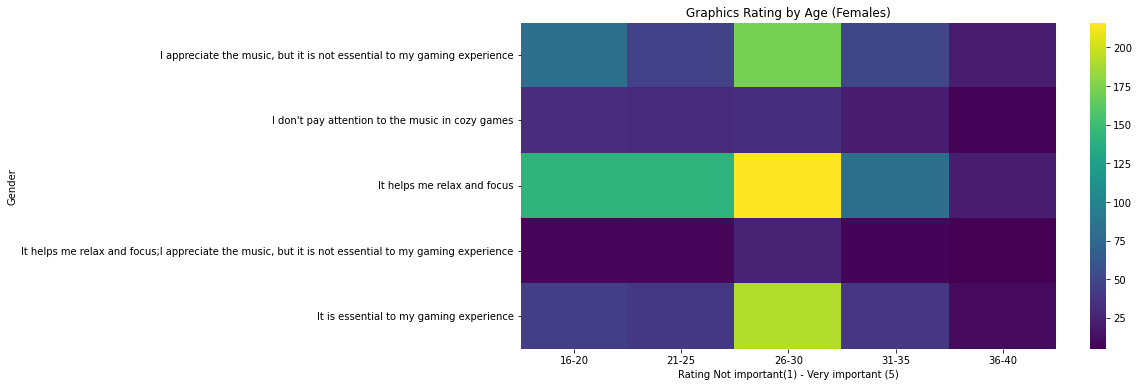

In [20]:
#MUSIC ; Overall for females any age the music helps relax and focus
h_map_female = female_newdf.groupby(by=['Music_Role','Age']).count()['Gender'].unstack()

plt.figure(figsize=(12,6))
sns.heatmap(h_map_female,cmap='viridis')
plt.xlabel('Rating Not important(1) - Very important (5)')
plt.ylabel('Gender')


plt.title('Graphics Rating by Age (Females)')
plt.show()

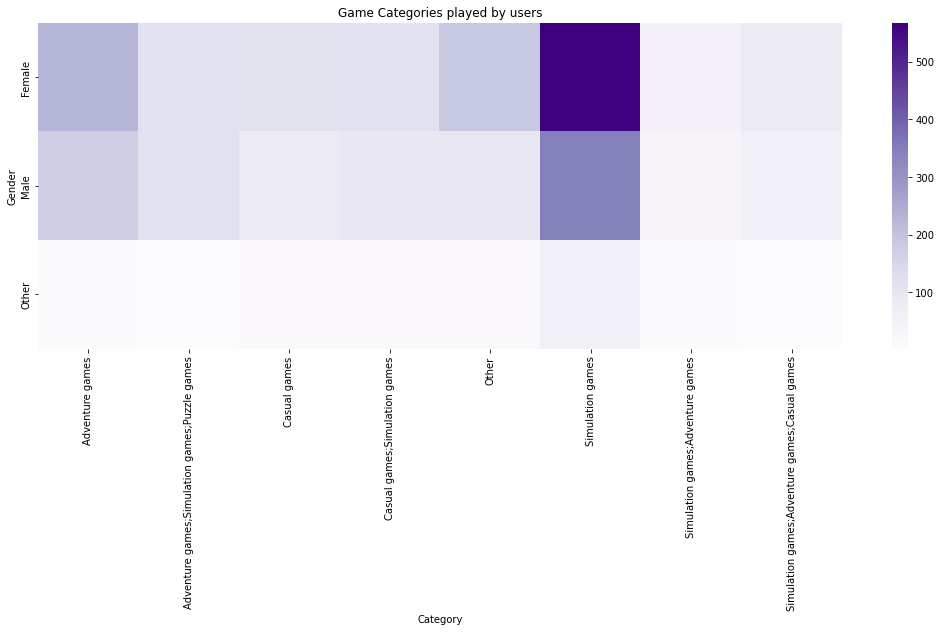

In [50]:
#Other insights
# we have data grouped together by ; make sure to group it together or cluster for better insight
#Device where most people play cozy games and type of cozy games more played


h_map_cozygame_type = newdf.groupby(by=['Gender','Game_Category']).count()['Age'].unstack().sort_index(axis=0, level='Game_Category',ascending=True)

#Heat map how much $ spent by gender

plt.figure(figsize=(18,6))
sns.heatmap(h_map_cozygame_type,cmap='Purples')
plt.xlabel('Category')
plt.ylabel('Gender')
plt.title('Game Categories played by users')
plt.show()


Adventure and simulation games are the most popular type of cozy games

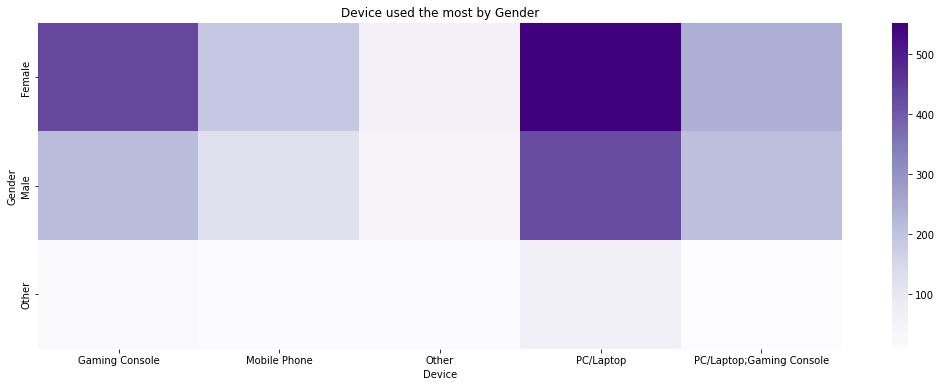

In [22]:
h_map_device = newdf.groupby(by=['Gender','Device']).count()['Age'].unstack().sort_index(axis=0, level='Device',ascending=True)

#Heat map how much $ spent by gender

plt.figure(figsize=(18,6))
sns.heatmap(h_map_device,cmap='Purples')
plt.xlabel('Device')
plt.ylabel('Gender')
plt.title('Device used the most by Gender')
plt.show()

Gaming console and PC most popular

**CONCLUSION**

gaming console and PC
simulation and adventure games are the most popular amongst the highest sample Women and Men from Ages 16-35

**Sample**
Largest group % that plays videogames is the 26-30 group with almost 40% of the sample. 
(formula for more women percentage)13.6% more Women tend to play more cozy games than men according to the sample.
to which of a sample of age group 21-30  56 % is female and 40% is male taking the majority of the sample (almost divided)

since female and male groups are almost same percentage, what is interesting is to evaluate by age groups

**Features**
Findings we had involved atmosphere, storyline and graphics being the top rated features needed to play cozy games
This meaning the most money to spend on feature improvement should be alocated to having a relaxing atmosphere, better 
graphics and an engaging storyline. Although female users top rated the features meaning this features are very important
to the game compared to their counterparts being on avergae regular - important lets remember that we can focus the insights 
not only on features but purchases in the game for... 

**$ MONEY**
according to our insights the amount spent on average by users both male and females was 10-25USD Monthly. 
We can see that the age group that spent the most was the 26-30 having 50% of the sample group with an average 
of 10-25USD Monthly, followed by the 16-20 (18%) age group and in third place 21-25 (16%)
if we focus the rewards on the 26-30 group we can dig deeper and see in what are they spending the most which is 
on virtual currency and new levels so we can focus on targeting to this specific features fro this age group 

**THINGS TO KEEP IN MIND FOR FUTURE ANALYSIS**
1. Identify what are other categories people spend on this captures %  of sample that we don´t know
2. 
